In [1]:
import os
import pickle
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tactile_encoding.utils.utils import value2key

from sklearn.preprocessing import minmax_scale


In [2]:
infile = open("../../data/data_encoding_original", 'rb')
#infile = open("./data/data_encoding_original", 'rb')
encoded_data_original = pickle.load(infile)
infile.close()


In [3]:
classes_list = {
    'A': "Tonic spiking",
    'B': "Class 1",
    'C': "Spike frequency adaptation",
    'D': "Phasic spiking",
    'E': "Accommodation",
    'F': "Threshold variability",
    'G': "Rebound spike",
    'H': "Class 2",
    'I': "Integrator",
    'J': "Input bistability",
    'K': "Hyperpolarizing spiking",
    'L': "Hyperpolarizing bursting",
    'M': "Tonic bursting",
    'N': "Phasic bursting",
    'O': "Rebound burst",
    'P': "Mixed mode",
    'Q': "Afterpotentials",
    'R': "Basal bistability",
    'S': "Preferred frequency",
    'T': "Spike latency",
}


### Create subplots

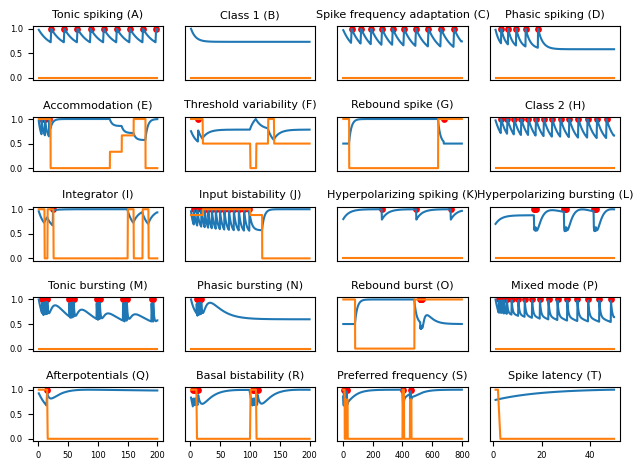

In [4]:
for num, el in enumerate(list(classes_list.values())):
    plt.subplot(5, 4, num+1)
    plt.title("{} ({})".format(el, value2key(el, classes_list)), fontsize=8)

    # raster plot
    spikes = np.reshape(np.array(encoded_data_original[num][0]), (np.array(
        encoded_data_original[num][0]).shape[0]))
    plt.scatter(np.where(spikes == 1)[
                0]+1, spikes[np.where(spikes == 1)], s=15, color='red')  # only plot spikes

    # voltage trace
    voltage = np.reshape(np.array(encoded_data_original[num][1]), (np.array(
        encoded_data_original[num][1]).shape[0]))
    plt.plot(range(1, len(voltage)+1), voltage/min(voltage))

    # input current trace
    input_current = np.reshape(np.array(encoded_data_original[num][2]), (np.array(
        encoded_data_original[num][2]).shape[0]))
    input_current = minmax_scale(
        input_current, feature_range=(0, 1), axis=0, copy=True)
    plt.plot(range(1, len(input_current)+1), input_current)

    # only plot on most outer subplot
    if num == 0 or num == 4 or num == 8 or num == 12:
        plt.xticks([], [])
        plt.tick_params(axis='y', labelsize=6)
    elif num == 16:
        plt.tick_params(axis='x', labelsize=6)
        plt.tick_params(axis='y', labelsize=6)
    elif num > 16:
        plt.tick_params(axis='x', labelsize=6)
        plt.yticks([], [])
    else:
        plt.xticks([], [])
        plt.yticks([], [])

    plt.tight_layout()
plt.show()


### Create single plots

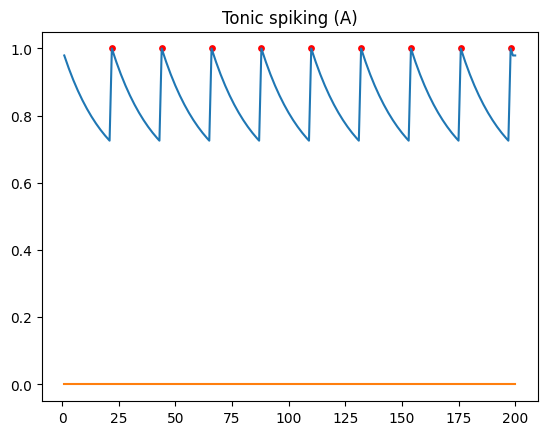

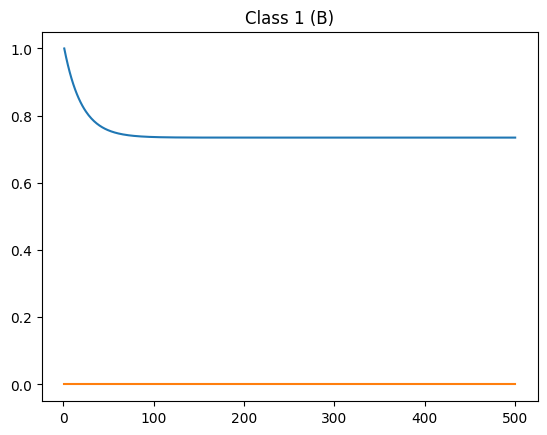

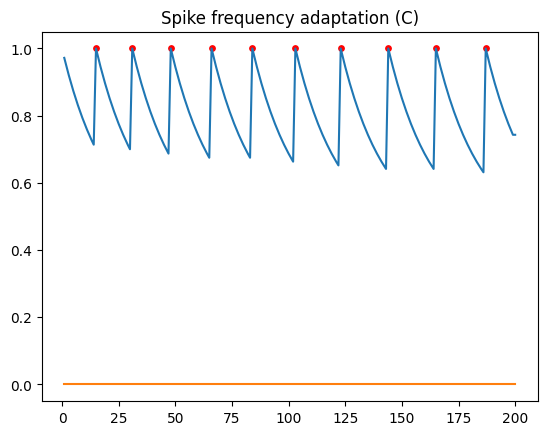

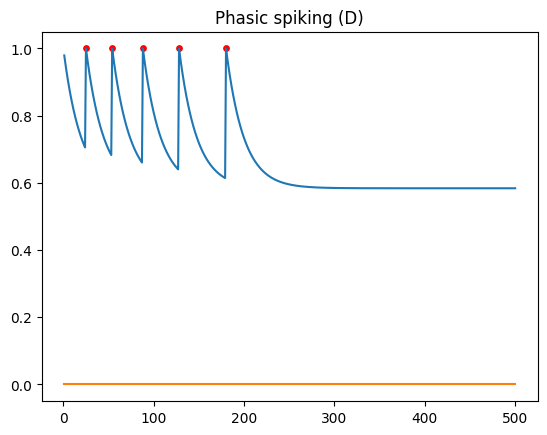

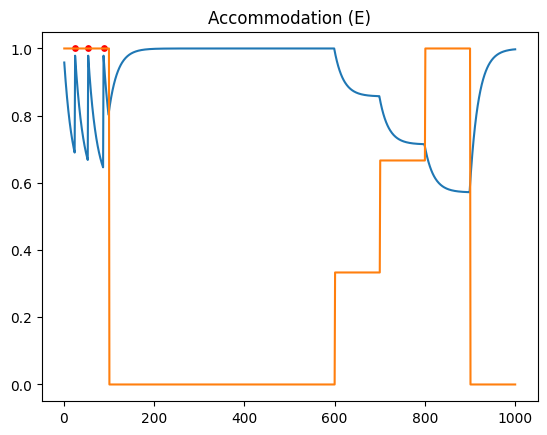

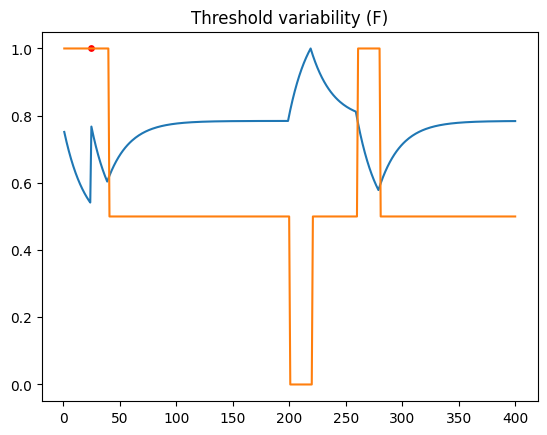

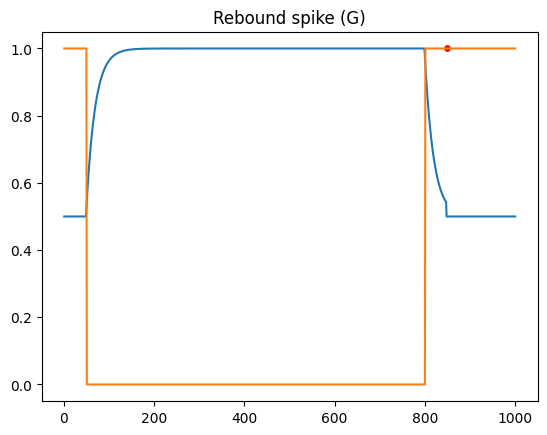

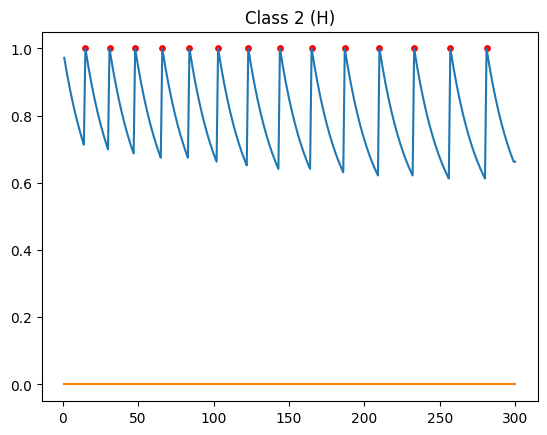

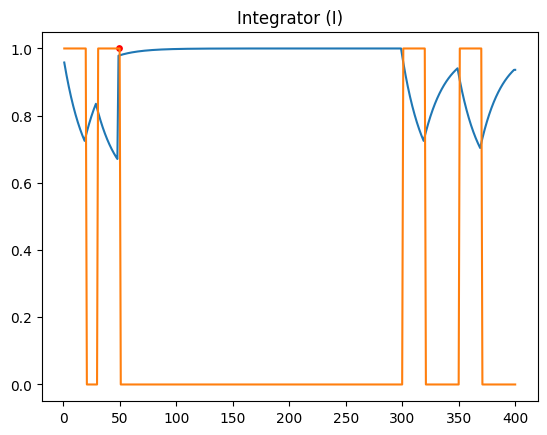

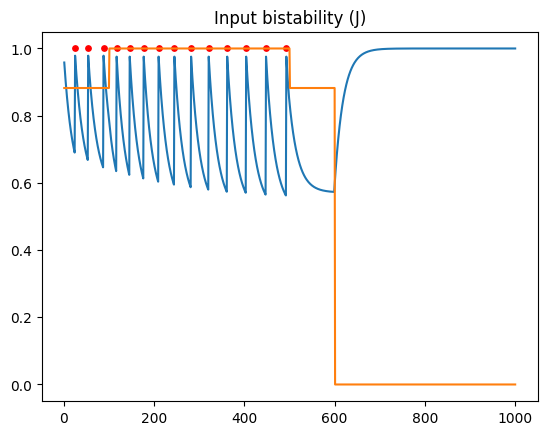

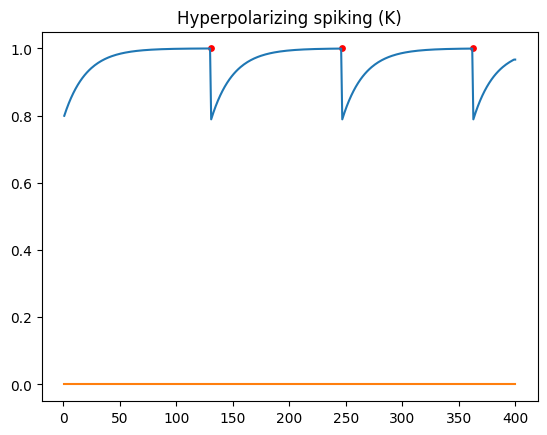

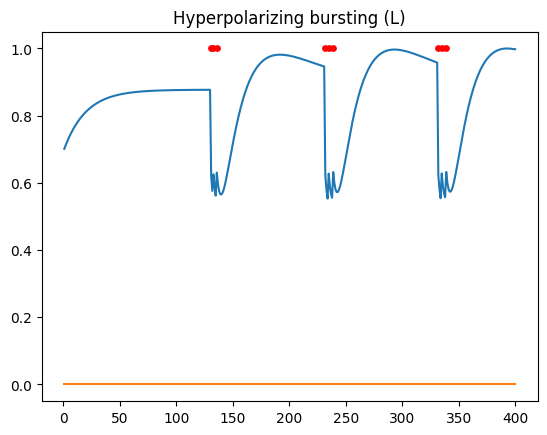

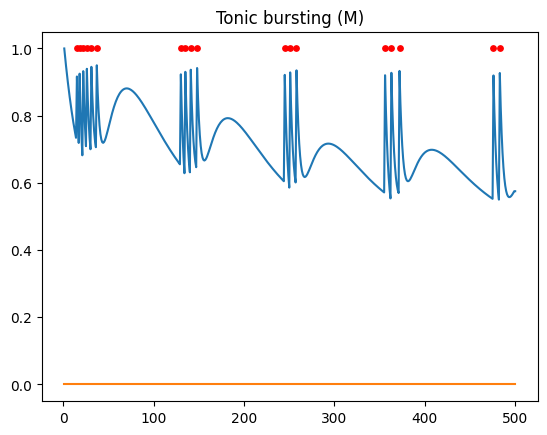

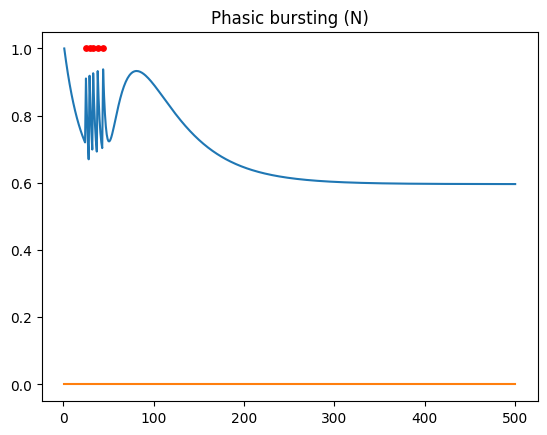

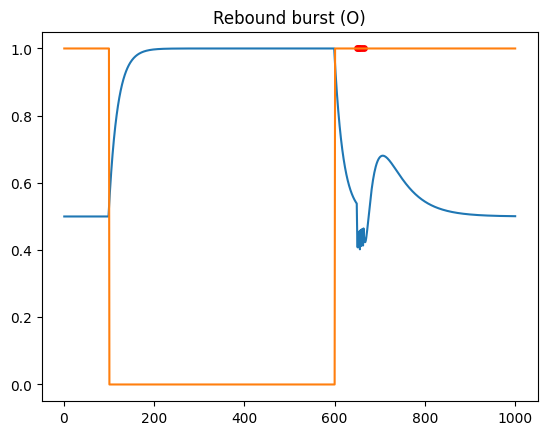

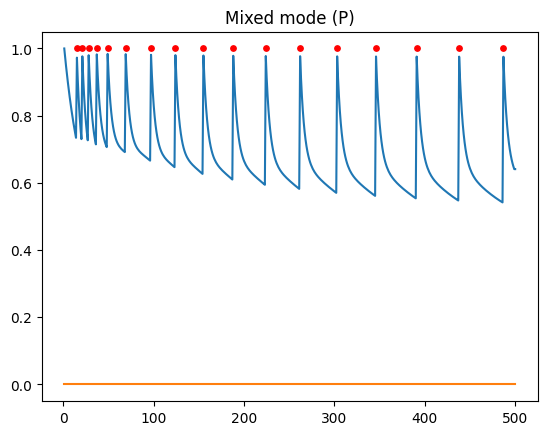

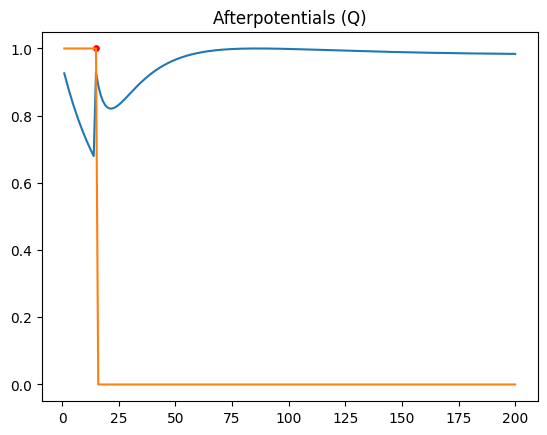

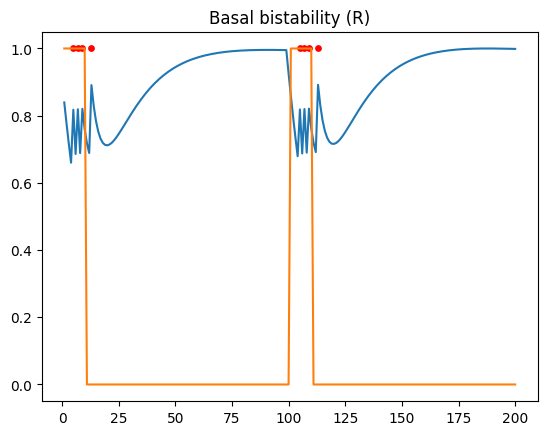

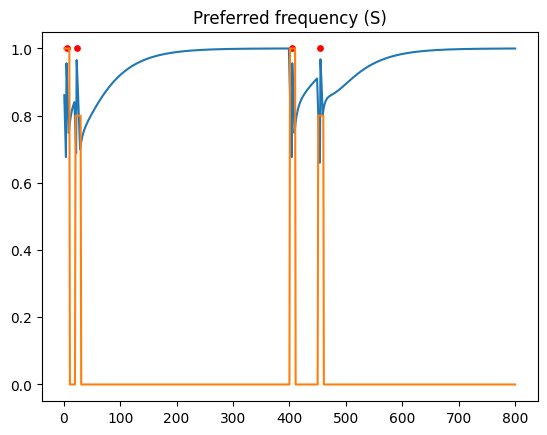

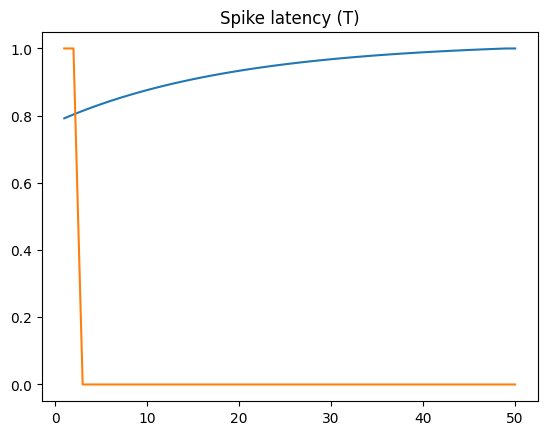

In [5]:
for num, el in enumerate(list(classes_list.values())):
    plt.title("{} ({})".format(el, value2key(el, classes_list)))
    
    # raster plot
    spikes = np.reshape(np.array(encoded_data_original[num][0]), (np.array(
        encoded_data_original[num][0]).shape[0]))
    plt.scatter(np.where(spikes == 1)[
                0]+1, spikes[np.where(spikes == 1)], s=15, color='red')  # only plot spikes

    # voltage trace
    voltage = np.reshape(np.array(encoded_data_original[num][1]), (np.array(
        encoded_data_original[num][1]).shape[0]))
    plt.plot(range(1, len(voltage)+1), voltage/min(voltage))

    # input current trace
    input_current = np.reshape(np.array(encoded_data_original[num][2]), (np.array(
        encoded_data_original[num][2]).shape[0]))
    
    input_current = minmax_scale(input_current, feature_range=(0, 1), axis=0, copy=True)
    plt.plot(range(1, len(input_current)+1), input_current)
    plt.show()


<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.